In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [26]:
df=pd.read_csv('credit_card_fraud_dataset.csv')

In [27]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [28]:
df=df.drop(['TransactionID'],axis=1)

In [29]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek 
df = df.drop(['TransactionDate'], axis=1)

In [30]:
encoder = OneHotEncoder(drop='first') 
encoded_features = encoder.fit_transform(df[['MerchantID', 'TransactionType', 'Location']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(['MerchantID', 'TransactionType', 'Location'], axis=1), encoded_df], axis=1)

In [31]:
scaler = StandardScaler()
df[['Amount', 'Hour', 'DayOfWeek']] = scaler.fit_transform(df[['Amount', 'Hour', 'DayOfWeek']])

In [32]:
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

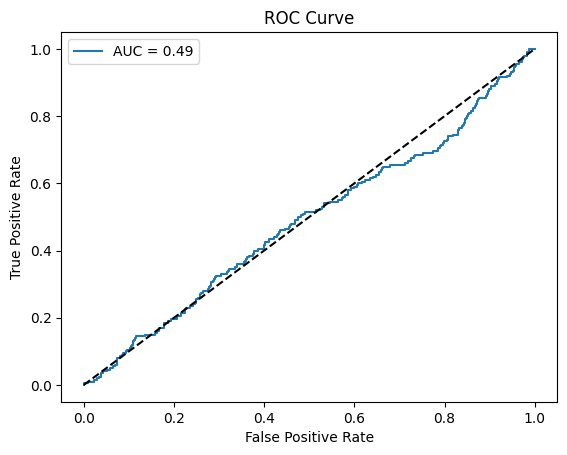

In [34]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

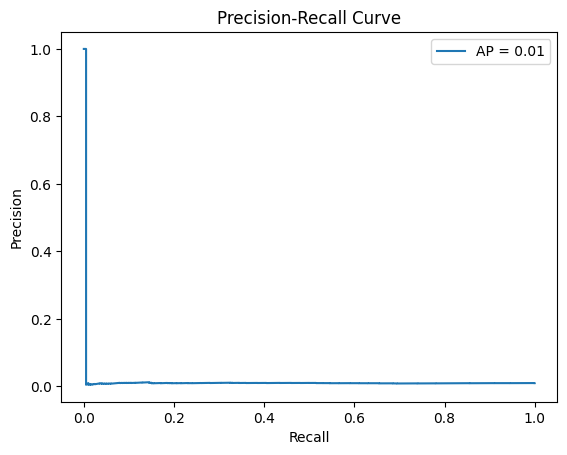

In [35]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()